In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import cmath
import math
from qutip import *
from math import e
j = cmath.sqrt(-1)

In [24]:
#definition of useful matrices
pauliZ = np.array([[1,0],[0,-1]], dtype=complex)
pauliX = np.array([[0,1],[1,0]], dtype=complex)
pauliY = np.array([[0,-j],[j,0]], dtype=complex)
I = 1.0*np.array([[1,0],[0,1]], dtype=complex)
N=2

In [25]:
#generating array for Sz for particle k, all identity exect the kth position which is pauliZ (X/Y)
SkZgen = np.full((N,N,2,2),I, dtype=complex)
SkXgen = np.full((N,N,2,2),I, dtype=complex)
SkYgen = np.full((N,N,2,2),I, dtype=complex)
for i in range(N):
    SkZgen[i,i] = 0.5*pauliZ
    SkXgen[i,i] = 0.5*pauliX
    SkYgen[i,i] = 0.5*pauliY

In [26]:
#creates array of SZ (SX/SY) operators in Hilbert space of N particles
#The element of the array is which particle SZ (SX/SY) acts on
SZ = np.zeros((N,2**N,2**N), dtype=complex)
SX = np.zeros((N,2**N,2**N), dtype=complex)
SY = np.zeros((N,2**N,2**N), dtype=complex)
for i in range(N):
    SiZgen = SkZgen[i]
    SjZ = SiZgen[0]
    SiXgen = SkXgen[i]
    SjX = SiXgen[0]
    SiYgen = SkYgen[i]
    SjY = SiYgen[0]
    for k in range(N-1):
        SjZ = np.kron(SjZ,SiZgen[k+1])
        SjX = np.kron(SjX,SiXgen[k+1])
        SjY = np.kron(SjY,SiYgen[k+1])
    SZ[i] = SjZ
    SX[i] = SjX
    SY[i] = SjY
print(SX[1])

[[0. +0.j 0.5+0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0.5+0.j 0. +0.j]]


In [27]:
#Define Hamiltonian 
B = 1
A0 = 1
sum = np.zeros((2**N,2**N))
for i in range(N-1):
    sum = sum +np.matmul(SZ[0],SZ[i+1]) + np.matmul(SX[0],SX[i+1]) + np.matmul(SY[0],SY[i+1])
H = B*SZ[0]+A0*sum
print(H)

[[ 0.75+0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.25+0.j  0.5 +0.j  0.  +0.j]
 [ 0.  +0.j  0.5 +0.j -0.75+0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j -0.25+0.j]]


In [28]:
#Diagonalize 
eng = np.real(la.eig(H)[0])
basis = np.transpose(la.eig(H)[1])
Obasis = np.identity(2**N)
print(basis)
print(basis[2])

[[-0.        +0.j -0.38268343+0.j  0.92387953+0.j -0.        +0.j]
 [ 0.        +0.j  0.92387953+0.j  0.38268343+0.j  0.        +0.j]
 [ 1.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  1.        +0.j]]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [29]:
#Initial State (in Z basis)
psi = np.zeros([1,2**N], dtype=complex)
psi[0][1]=1
print(psi[0])

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


In [30]:
#Change of basis matrix
COB = np.zeros((2**N,2**N), dtype=complex)
for i in range(2**N):
    for k in range(2**N):
        COB[i][k] = np.dot(basis[i],Obasis[k])
psiN = np.matmul(COB,np.transpose(psi))
print(psiN)

[[-0.38268343+0.j]
 [ 0.92387953+0.j]
 [ 0.        +0.j]
 [ 0.        +0.j]]


In [31]:
#Evolve
steps = 20
t = np.arange(steps)
psit = np.zeros([steps,1,2**N], dtype=complex)
for i in range(steps):
    for k in range(2**N):
        psit[i][0][k] = psiN[k][0]*e**(-j*eng[k]*t[i])

In [32]:
#expectation value of SZ0
ESZ0 = np.zeros(steps)
SZ0E= np.matmul(COB,SZ[0])
for i in range(steps):
    psitTran = np.transpose(psit[i])
    psitCon = np.conjugate(psit[i])
    a =np.matmul(SZ0E,psitTran, dtype=complex)
    ESZ0[i] = np.real(np.matmul(psitCon,a, dtype=complex))

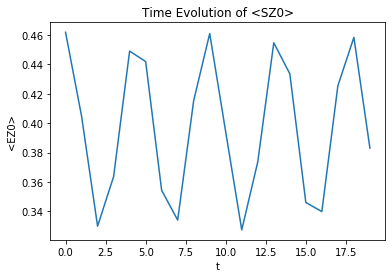

In [33]:
plt.plot(t,ESZ0)
plt.title('Time Evolution of <SZ0>')
plt.ylabel("<EZ0>")
plt.xlabel("t")
plt.show()